<center><img src="ignaz_semmelweis_1860_small.jpeg"></center>

Hungarian physician Dr. Ignaz Semmelweis worked at the Vienna General Hospital with childbed fever patients. Childbed fever is a deadly disease affecting women who have just given birth, and in the early 1840s, as many as 10% of the women giving birth died from it at the Vienna General Hospital. Dr.Semmelweis discovered that it was the contaminated hands of the doctors delivering the babies, and on **June 1st, 1847**, he decreed that everyone should wash their hands, an unorthodox and controversial request; nobody in Vienna knew about bacteria.

You will reanalyze the data that made Semmelweis discover the importance of handwashing and its impact on the hospital and the number of deaths.

The data is stored as two CSV files within the `data` folder.

`data/yearly_deaths_by_clinic.csv` contains the number of women giving birth at the two clinics at the Vienna General Hospital between the years 1841 and 1846.

| Column | Description |
|--------|-------------|
|`year`  |Years (1841-1846)|
|`births`|Number of births|
|`deaths`|Number of deaths|
|`clinic`|Clinic 1 or clinic 2|

`data/monthly_deaths.csv` contains data from 'Clinic 1' of the hospital where most deaths occurred.

| Column | Description |
|--------|-------------|
|`date`|Date (YYYY-MM-DD)
|`births`|Number of births|
|`deaths`|Number of deaths|

In [15]:
# Imported libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [16]:
# Start coding here
# Use as many cells as you like!
plt.style.use('ggplot')
df = pd.read_csv('data/yearly_deaths_by_clinic.csv')
highest_years_clinic = df.groupby(['clinic', 'year'])[['deaths']].sum().reset_index()

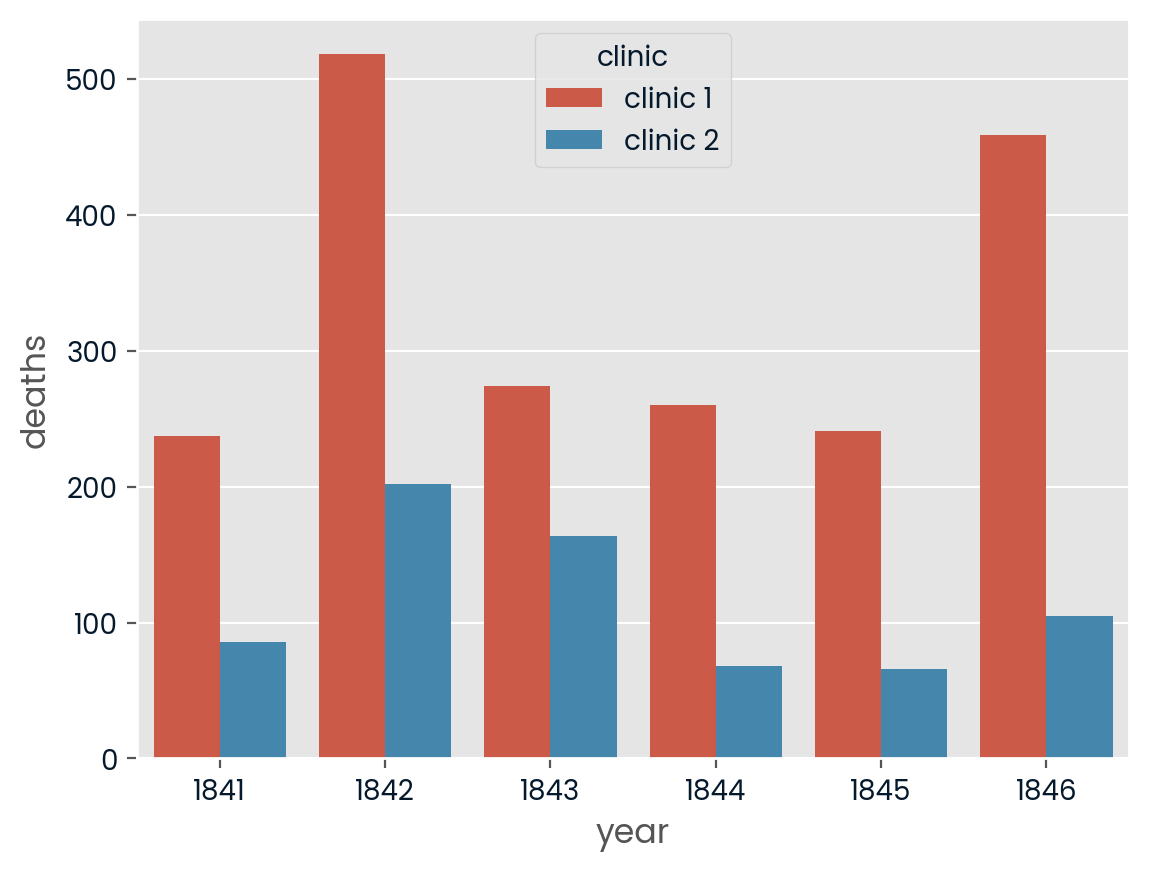

In [17]:
viz = sns.barplot(x='year', y='deaths', data=highest_years_clinic, hue='clinic')
highest_year = 1842

In [18]:
df_2 = pd.read_csv('data/monthly_deaths.csv')
df_2.head()

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2


In [19]:
alpha = 0.95
t_stat, p_value = stats.ttest_ind(before_jun['deaths'], after_jun['deaths'])
p_value < alpha

True

In [20]:
# Add proportion_deaths to the DataFrame
df_2["proportion_deaths"] = df_2["deaths"] / df_2["births"]

# Add the threshold as the date handwashing was introduced
handwashing_start = '1847-06-01'

# Create a boolean column that shows True after the date handwashing was introduced
df_2['handwashing_started'] = df_2['date'] >= handwashing_start

# Group by the new boolean column calculate the mean proportion of deaths
# Reset the index to store the result as a DataFrame
monthly_summary = df_2.groupby('handwashing_started').agg(
    mean_proportion_deaths=('proportion_deaths', 'mean')
).reset_index()

print(monthly_summary)

# Analyze the difference in the mean monthly proportion of deaths and calculate a 95% confidence interval

# Split the monthly data into before and after handwashing was introduced
before_washing = df_2[df_2["date"] < handwashing_start]
after_washing = df_2[df_2["date"] >= handwashing_start]
before_proportion = before_washing["proportion_deaths"]
after_proportion = after_washing["proportion_deaths"]

# Perform a bootstrap analysis of the reduction of deaths due to handwashing
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac=1, replace=True)
    boot_after = after_proportion.sample(frac=1, replace=True)
    boot_mean_diff.append( boot_after.mean() - boot_before.mean() )

# Calculate a 95% confidence interval
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
print(confidence_interval)

   handwashing_started  mean_proportion_deaths
0                False                0.105050
1                 True                0.021093
0.025   -0.101008
0.975   -0.067779
dtype: float64
